#Theoritical

###1. What is Boosting in Machine Learning
Ensemble technique to combine multiple weak learner models into a strong learner.The key idea behind boosting is to focus on data points that were incorrectly classified or predicted by earlier models.

###2. How does Boosting differ from Bagging
Bagging have the models arranged parallely, Boosting keeps the models sequentially.It uses random sampling.Every model is independent of each other.The aim is to reduce variance and prevent overfitting

Boosting have the models arranged sequentially.Itreduces bias by focusing on difficult cases.It gives higher weight to data points that were misclassified

###3. What is the key idea behind AdaBoost
The key idea behind AdaBoost is to combine multiple weak learners (decision stumps) into a single strong learner.Each training data point starts with equal weights. With iteratations, AdaBoost adjusts these weights to to focus on misclassified data by previous models.AdaBoost combines the weak learners into a strong learner by weighting their predictions. Models with better accuracy are given more weigtage in the final outcome.


###4. Explain the working of AdaBoost with an example

Problem - Classify SPAM/HAM
Dataset 10 email data points with SPAM/HAM

Step1: Asiign equal wight 1/10 to all data points.
Step2: calculate the total error. If we assume 1 data is having error then total error is 1/10.
Step3: calculate the performance of the stump = 1/2 ln((1-1/10)/1/10)
Step4: The weights are re adjusted, with

correctly predicted points are given weight = previous weight(1/10) * e**-performance of the stump

incorrectly predicted points are given weight = previous weight(1/10) * e**+performance of the stump
step5: weights are normalized and assigned into bins starting from 0 to 1

step6: generate random numbers between 0 to 1 and get the data point from the bin based on the random number. as the misclassified point is having wider range, it will be picked multiple times more than the other points.

step7: The newly created record set will be sent to the next stump

This process is continued in the iterative fashion till the expected number of stumps are created or no incorrect classified data is present.

The final outcome
f= alpha1 M1 +...+alpha n Mn
where alpha is the model performance

The  alpha values for each class is grouped together & the highest scoring group is selected as the outcome


###5. What is Gradient Boosting, and how is it different from AdaBoost

Gradient boosting tries to minimize the loss function through gradient descent.

Adaboost
  - uses exponential loss function
  - re weights data points to prioritize misclassified ones
  - Learner's influence is based on their classification acccuracy

XGBoost
  - Uses custom loss function(eg MSE,log loss)
  - Models the residual error at each step
  - Learner's influence is based on gradient optimization

###6. What is the loss function in Gradient Boosting

For classification
𝑦𝑖 = log⁡(𝑦^𝑖)
for the positive class, and

(1−𝑦𝑖)log⁡(1−𝑦^𝑖)
for the negative class.

For regression
MSE/MAE

###7. How does XGBoost improve over traditional Gradient Boosting
XGBoot applies below techniques
  - Learning rate
  - Early stopping
  - Supports custom loss function
  - has pruning strategy
  - parllel processing
  - handle missing data
  - Includes regularization (L1,L2)

###8. What is the difference between XGBoost and CatBoost

XGBoost
  - Requires encoding like OHE for categorical featured
  - using traditioanl gradient boost algorithm
  - requires more categorical feature processing than catboost
  - uses L1,L2 regularization

Catboost
  - natively supports categorical features
  - using ordered boosting
  - slower than XGBoost
  - uses own methods to regularize

###9. What are some real-world applications of Boosting techniques
  - fraud detection
  - credit score , risk assessment
  - recommendation system
  - dsease preediction

###10. How does regularization help in XGBoost

Regularization prevents overfitting and improves model performance.
L1 - Helps with high dimension data.
L2 - Smoothens the model & reduces variance

###11. What are some hyperparameters to tune in Gradient Boosting models

loss
learning_rate
n_estimators
subsample
criterion
min_samples_split
min_samples_leaf
min_weight_fraction_leaf
max_depth=3
min_impurity_decrease
max_features
max_leaf_nodes
n_iter_no_change
ccp_alpha


###12. What is the concept of Feature Importance in Boosting

Feature importance predicts how important a feature is in the prediction.
Boosting algorithms build ensemble of decision trees, and the importance of a feature is derived from how often and effectively it is used to split the data across all the trees.

###13. Why is CatBoost efficient for categorical data
  - Native handling of categorical features
  - ordered boosting
  - efficient feature transformation
  - handles missing data
  - reduced computation by bypassing the need of encodings

#Practical

In [2]:
###14. Train an AdaBoost Classifier on a sample dataset and print model accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = AdaBoostClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_pred,y_test)}")

Accuracy Score 0.9824561403508771


In [14]:
###15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,r2_score

X,y =  make_regression(n_samples=1000,n_features=20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Mean absolute error {mean_absolute_error(y_pred,y_test)} R2 score {r2_score(y_pred,y_test)}")

Mean absolute error 70.7342951079114 R2 score 0.3694910481374434


In [15]:
###16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = GradientBoostingClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_pred,y_test)}")
print(f"Feature importance {model.feature_importances_}")

Accuracy Score 0.9532163742690059
Feature importance [1.22465356e-03 3.50735991e-02 1.68279413e-03 4.77119250e-04
 3.51322515e-03 7.34369868e-04 4.25612498e-04 1.53403041e-01
 1.36208676e-04 1.30340068e-05 5.20736603e-03 1.13343705e-03
 1.26522697e-03 1.73195500e-02 6.04229975e-04 1.00935967e-04
 1.79484505e-03 7.79734206e-06 2.05833997e-03 7.00727569e-04
 1.65000926e-01 3.92662935e-02 2.65738779e-01 1.33755598e-02
 1.71641883e-03 1.84412063e-05 8.38500870e-03 2.76506782e-01
 1.96626177e-04 2.91905139e-03]


In [16]:
###17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score

X,y =  make_regression(n_samples=1000,n_features=20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Mean absolute error {mean_absolute_error(y_pred,y_test)} R2 score {r2_score(y_pred,y_test)}")

Mean absolute error 44.40607450039867 R2 score 0.8887201660691206


In [17]:
###18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

#!pip install xgboost

from xgboost import XGBClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model_gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1)

model_gb.fit(X_train,y_train)

y_pred = model_gb.predict(X_test)

print(f"Gradient Boosting ---- Accuracy Score {accuracy_score(y_pred,y_test)}")


model_xg = XGBClassifier(n_estimators=500,learning_rate=0.1)

model_xg.fit(X_train,y_train)

y_pred = model_xg.predict(X_test)

print(f"XG Boost ---- Accuracy Score {accuracy_score(y_pred,y_test)}")

Gradient Boosting ---- Accuracy Score 0.9707602339181286
XG Boost ---- Accuracy Score 0.9707602339181286


In [22]:
###19. Train a CatBoost Classifier and evaluate using F1-Score


# !pip install --upgrade numpy
# !pip install catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,f1_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = CatBoostClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"CatBoostClassifier Accuracy Score {accuracy_score(y_pred,y_test)}")
print(f"CatBoostClassifier F1 Score {f1_score(y_pred,y_test)}")

Learning rate set to 0.006952
0:	learn: 0.6815482	total: 49.4ms	remaining: 49.3s
1:	learn: 0.6712582	total: 83.9ms	remaining: 41.9s
2:	learn: 0.6610865	total: 113ms	remaining: 37.5s
3:	learn: 0.6509819	total: 142ms	remaining: 35.2s
4:	learn: 0.6399293	total: 164ms	remaining: 32.7s
5:	learn: 0.6311387	total: 192ms	remaining: 31.9s
6:	learn: 0.6214123	total: 233ms	remaining: 33.1s
7:	learn: 0.6108297	total: 250ms	remaining: 31s
8:	learn: 0.6018209	total: 288ms	remaining: 31.7s
9:	learn: 0.5927516	total: 309ms	remaining: 30.6s
10:	learn: 0.5831024	total: 328ms	remaining: 29.5s
11:	learn: 0.5748092	total: 368ms	remaining: 30.3s
12:	learn: 0.5668789	total: 397ms	remaining: 30.1s
13:	learn: 0.5586471	total: 430ms	remaining: 30.3s
14:	learn: 0.5502279	total: 468ms	remaining: 30.7s
15:	learn: 0.5431033	total: 497ms	remaining: 30.6s
16:	learn: 0.5361868	total: 519ms	remaining: 30s
17:	learn: 0.5288261	total: 533ms	remaining: 29.1s
18:	learn: 0.5212708	total: 550ms	remaining: 28.4s
19:	learn: 0.

In [4]:
###20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

#!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

X,y =  make_regression(n_samples=1000,n_features=20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = XGBRegressor(n_estimators=500,learning_rate=0.1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Mean squared error {mean_squared_error(y_pred,y_test)} R2 score {r2_score(y_pred,y_test)}")

Mean squared error 7487.770541097808 R2 score 0.6196015380401543


Accuracy Score 0.9532163742690059


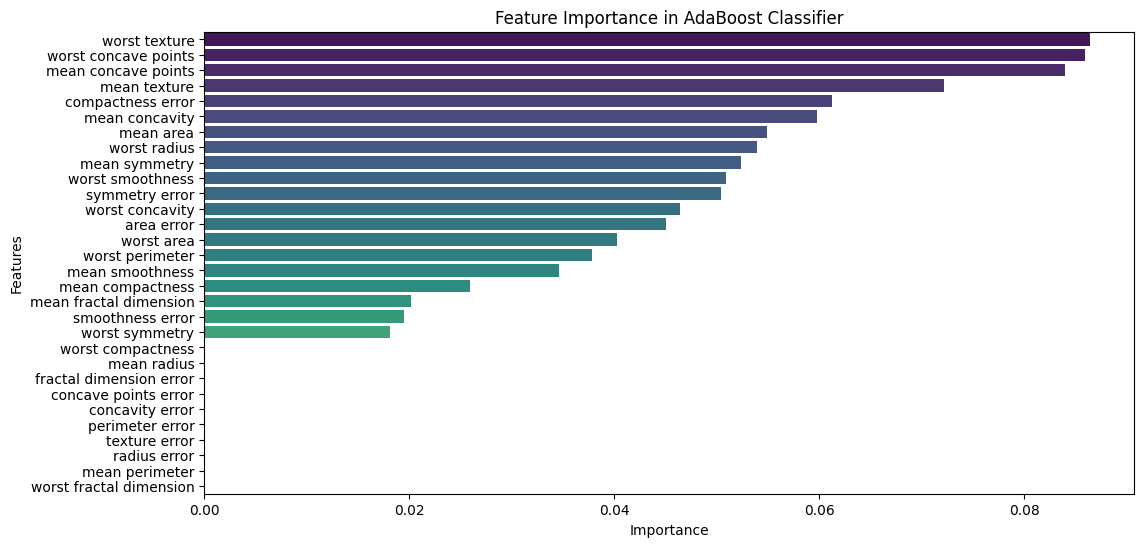

In [2]:
###21. Train an AdaBoost Classifier and visualize feature importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = AdaBoostClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_pred,y_test)}")

feature_importance = model.feature_importances_
features = load_breast_cancer().feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in AdaBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Mean absolute error 46.832423577856105 R2 score 0.8880222612645559


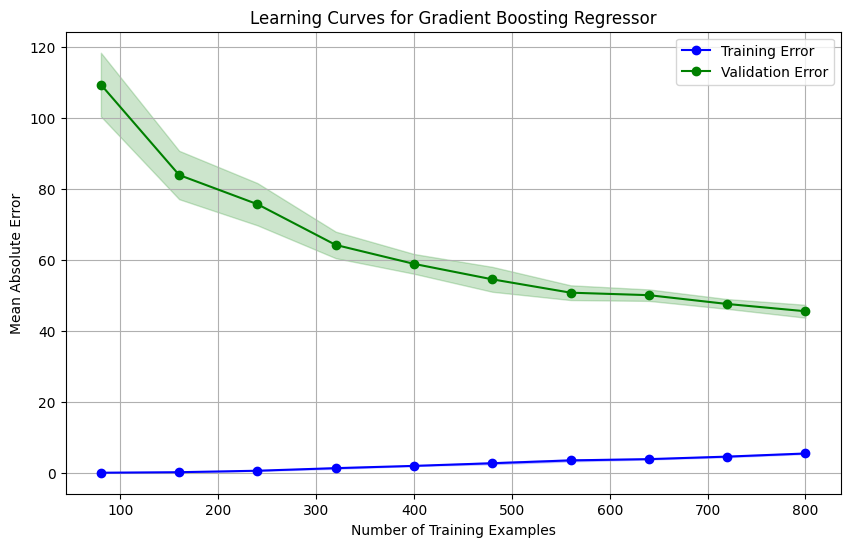

In [29]:
###22. Train a Gradient Boosting Regressor and plot learning curves
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score

X,y =  make_regression(n_samples=1000,n_features=20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Mean absolute error {mean_absolute_error(y_pred,y_test)} R2 score {r2_score(y_pred,y_test)}")

def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    # Calculate mean and standard deviation
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green', marker='o')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.2)

    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Absolute Error')
    plt.title('Learning Curves for Gradient Boosting Regressor')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curves(model, X, y)

Accuracy Score 0.9649122807017544


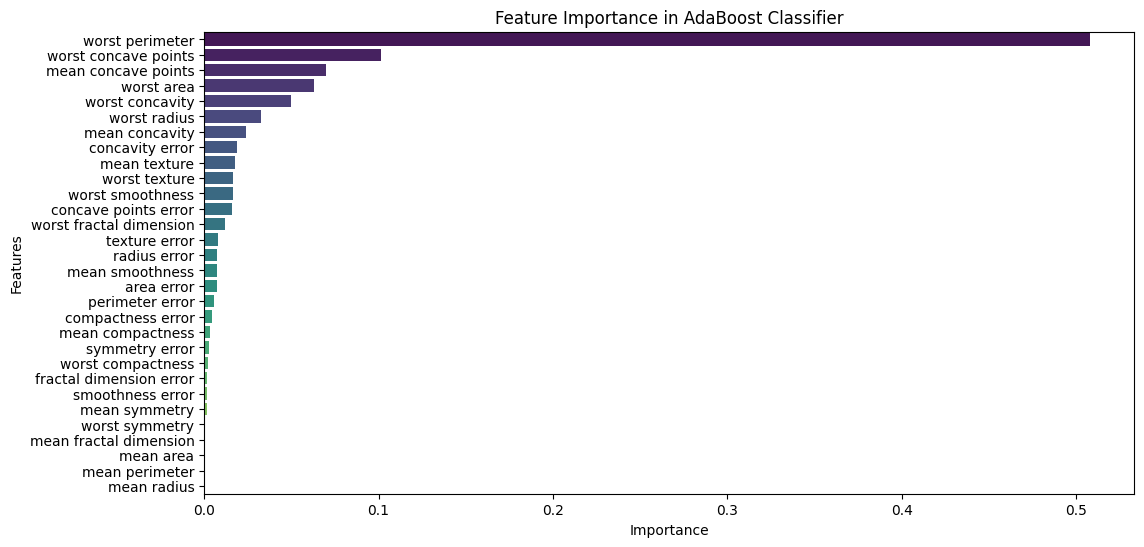

In [5]:
###23. Train an XGBoost Classifier and visualize feature importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = XGBClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_pred,y_test)}")

feature_importance = model.feature_importances_
features = load_breast_cancer().feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in AdaBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

CatBoostClassifier Accuracy Score 0.9649122807017544
CatBoostClassifier F1 Score 0.9702970297029703


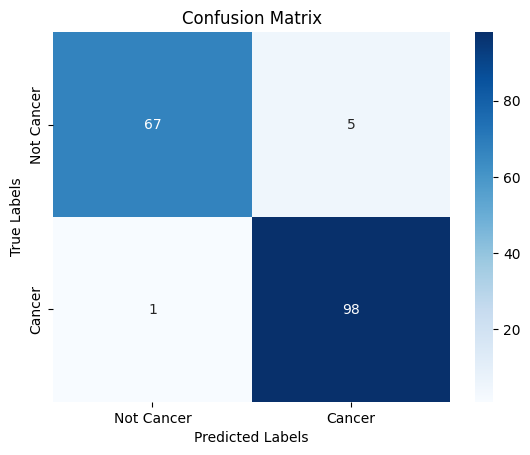

In [28]:
###24. Train a CatBoost Classifier and plot the confusion matrix


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = CatBoostClassifier(verbose=False)

model.fit(X_train,y_train)

y_pred = model.predict(X_test, verbose=False)

print(f"CatBoostClassifier Accuracy Score {accuracy_score(y_pred,y_test)}")
print(f"CatBoostClassifier F1 Score {f1_score(y_pred,y_test)}")

cnf = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cancer', 'Cancer'], yticklabels=['Not Cancer', 'Cancer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
###25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


estimator=[10,20,30,40,50,70,100,200]

for i in estimator:
  model = AdaBoostClassifier(n_estimators=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f"Estimator {i} --- Accuracy Score {accuracy_score(y_pred,y_test)}")

Estimator 10 --- Accuracy Score 0.9532163742690059
Estimator 20 --- Accuracy Score 0.9649122807017544
Estimator 30 --- Accuracy Score 0.9649122807017544
Estimator 40 --- Accuracy Score 0.9824561403508771
Estimator 50 --- Accuracy Score 0.9707602339181286
Estimator 70 --- Accuracy Score 0.9824561403508771
Estimator 100 --- Accuracy Score 0.9824561403508771
Estimator 200 --- Accuracy Score 0.9824561403508771


Accuracy Score 0.9707602339181286
Feature importance [8.34411252e-04 5.62654637e-02 8.17961158e-05 7.63281805e-04
 1.29138152e-06 5.75377419e-04 6.03100491e-03 6.74276129e-02
 0.00000000e+00 4.73562988e-04 2.18179286e-03 1.45270406e-03
 6.42798985e-03 1.53796927e-03 1.20377984e-04 1.24219807e-02
 3.17718468e-04 4.55278255e-04 2.23696983e-04 2.46614373e-03
 4.18171845e-01 2.44886877e-02 2.31602816e-01 5.75786713e-02
 1.31007340e-02 5.58882769e-06 8.88335624e-03 7.89923628e-02
 1.91585259e-03 5.20063072e-03]
Accuracy Score: 0.9707602339181286


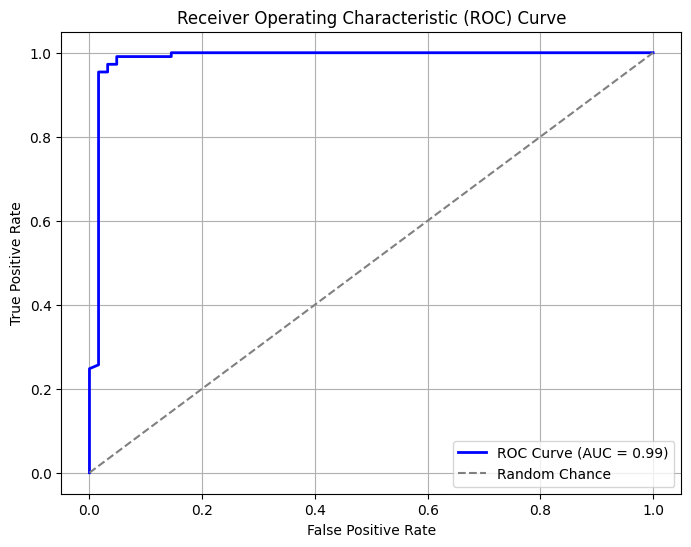

In [12]:
###26. Train a Gradient Boosting Classifier and visualize the ROC curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = GradientBoostingClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_pred,y_test)}")
print(f"Feature importance {model.feature_importances_}")

y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [16]:
###27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

X,y =  make_regression(n_samples=1000,n_features=20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

params_grid = {
    'learning_rate':[0.1,0.2,0.3,0.5,1,1.1]
}
model = GridSearchCV(estimator=XGBRegressor(),param_grid=params_grid,verbose=0,scoring='accuracy',cv=5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"Best learning rate {model.best_params_['learning_rate']}")

Best learning rate 0.1


Without Class Weights:
Accuracy: 0.9566666666666667
F1 Score: 0.7346938775510204
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       270
           1       0.95      0.60      0.73        30

    accuracy                           0.96       300
   macro avg       0.95      0.80      0.86       300
weighted avg       0.96      0.96      0.95       300


With Class Weights:
Accuracy: 0.9366666666666666
F1 Score: 0.6779661016949152
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       270
           1       0.69      0.67      0.68        30

    accuracy                           0.94       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.94      0.94      0.94       300



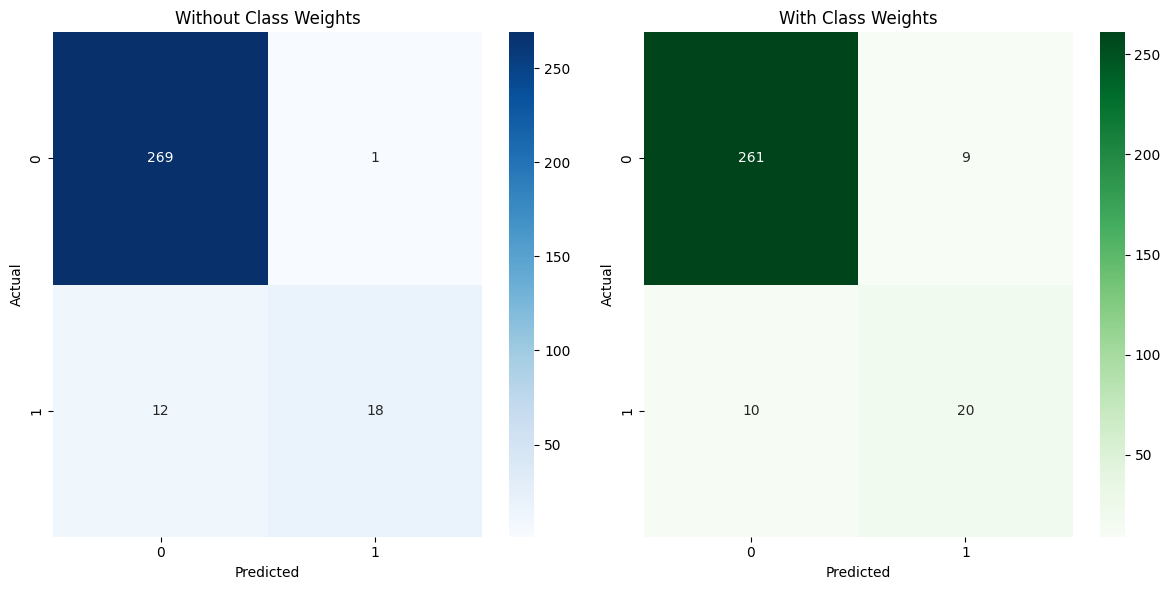

In [30]:
###28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_without_weights = CatBoostClassifier(verbose=False)
model_without_weights.fit(X_train, y_train)

y_pred_without_weights = model_without_weights.predict(X_test)
accuracy_without_weights = accuracy_score(y_test, y_pred_without_weights)
f1_without_weights = f1_score(y_test, y_pred_without_weights)
print("Without Class Weights:")
print(f"Accuracy: {accuracy_without_weights}")
print(f"F1 Score: {f1_without_weights}")
print(classification_report(y_test, y_pred_without_weights))

class_weights = {0: 1, 1: 9}
model_with_weights = CatBoostClassifier(class_weights=class_weights, verbose=False)
model_with_weights.fit(X_train, y_train)

y_pred_with_weights = model_with_weights.predict(X_test)
accuracy_with_weights = accuracy_score(y_test, y_pred_with_weights)
f1_with_weights = f1_score(y_test, y_pred_with_weights)
print("\nWith Class Weights:")
print(f"Accuracy: {accuracy_with_weights}")
print(f"F1 Score: {f1_with_weights}")
print(classification_report(y_test, y_pred_with_weights))

conf_matrix_without_weights = confusion_matrix(y_test, y_pred_without_weights)
conf_matrix_with_weights = confusion_matrix(y_test, y_pred_with_weights)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix_without_weights, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Without Class Weights')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_with_weights, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('With Class Weights')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [6]:
###29. Train an AdaBoost Classifier and analyze the effect of different learning rates

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X,y =  load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


learning_rate=[0.1,0.2,0.3,0.5,1,1.1]

for i in  learning_rate:
  model = AdaBoostClassifier(learning_rate=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f"Learning rate {i} --- Accuracy Score {accuracy_score(y_pred,y_test)}")

Learning rate 0.1 --- Accuracy Score 0.9239766081871345
Learning rate 0.2 --- Accuracy Score 0.935672514619883
Learning rate 0.3 --- Accuracy Score 0.935672514619883
Learning rate 0.5 --- Accuracy Score 0.9415204678362573
Learning rate 1 --- Accuracy Score 0.9298245614035088
Learning rate 1.1 --- Accuracy Score 0.9298245614035088


In [20]:
###30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from xgboost import XGBClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,log_loss

X,y =  make_classification(n_samples=1000,n_features=20,n_classes=4,n_redundant=1,n_clusters_per_class=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model_xg = XGBClassifier(n_estimators=500,learning_rate=0.1)

model_xg.fit(X_train,y_train)

y_pred = model_xg.predict(X_test)

print(f"XG Boost ---- Accuracy Score {accuracy_score(y_pred,y_test)}")
print(f"XG Boost ---- Log loss {log_loss(y_test,model_xg.predict_proba(X_test))}")

XG Boost ---- Accuracy Score 0.8366666666666667
XG Boost ---- Log loss 0.709768273680426
